## Crisp-DM CSGO

## Fase 1: Business Understanding

El objetivo de este proyecto es desarrollar un modelo de regresión que permita predecir el puntaje de impacto de un jugador (`ImpactPlayerScore`) basado en sus estadísticas dentro del juego. Esto ayudará a evaluar el desempeño determinando en primera instancia si es jugador nuevo o no y predecir el valor mediante tecnicas que seran implementadas en las dos fases finales del analsis crisp-**dm**

---



## Fase 2: Data Understanding

Se hace un analisis general del dataset con informacion de los jugadores por medio de las partidas y su rendimiento por medio de la informacion obtenida en el dataset de CS:GO

In [33]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [34]:
#cargar datos
uploaded = files.upload()
for fn in uploaded.keys():
    name = fn

Saving Anexo ET_demo_round_traces_2022 (1).csv to Anexo ET_demo_round_traces_2022 (1) (2).csv


In [35]:
df = pd.read_csv(name, sep=";")

<ipython-input-35-24fd2bc964d0>:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


In [36]:
print(df.columns)



Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')


In [37]:
display(df.head())
df.info()


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [38]:
# Eliminar columnas innecesarias como "Unnamed"
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

# Convertir columnas clave a numéricas sin borrar filas
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Rellenar valores nulos con 0 en columnas importantes
df[['TimeAlive', 'TravelledDistance', 'FirstKillTime']] = df[['TimeAlive', 'TravelledDistance', 'FirstKillTime']].fillna(0)
df.drop('AbnormalMatch', axis=1, inplace=True)
df.drop('InternalTeamId', axis=1, inplace=True)

In [39]:


# Estadística descriptiva
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.000
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.000
TimeAlive,79157.0,2.772309,40.181962,0.0,0.0,0.0,0.0,990.625
TravelledDistance,79157.0,4.204304,737.129016,0.0,0.0,0.0,0.0,171008.000
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.000
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.000
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.000
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.000
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.000
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.000


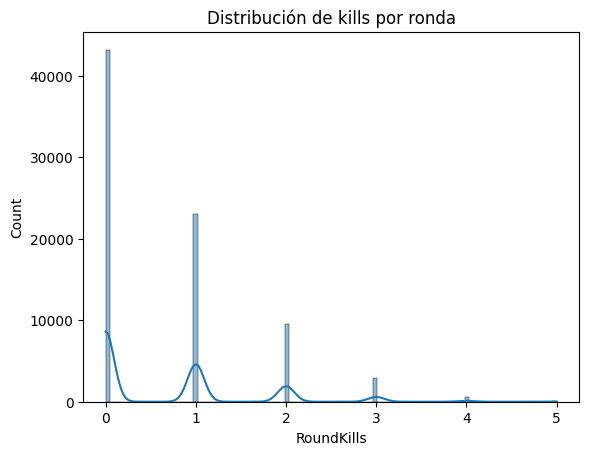

In [40]:
sns.histplot(df["RoundKills"], kde=True)
plt.title("Distribución de kills por ronda")
plt.show()

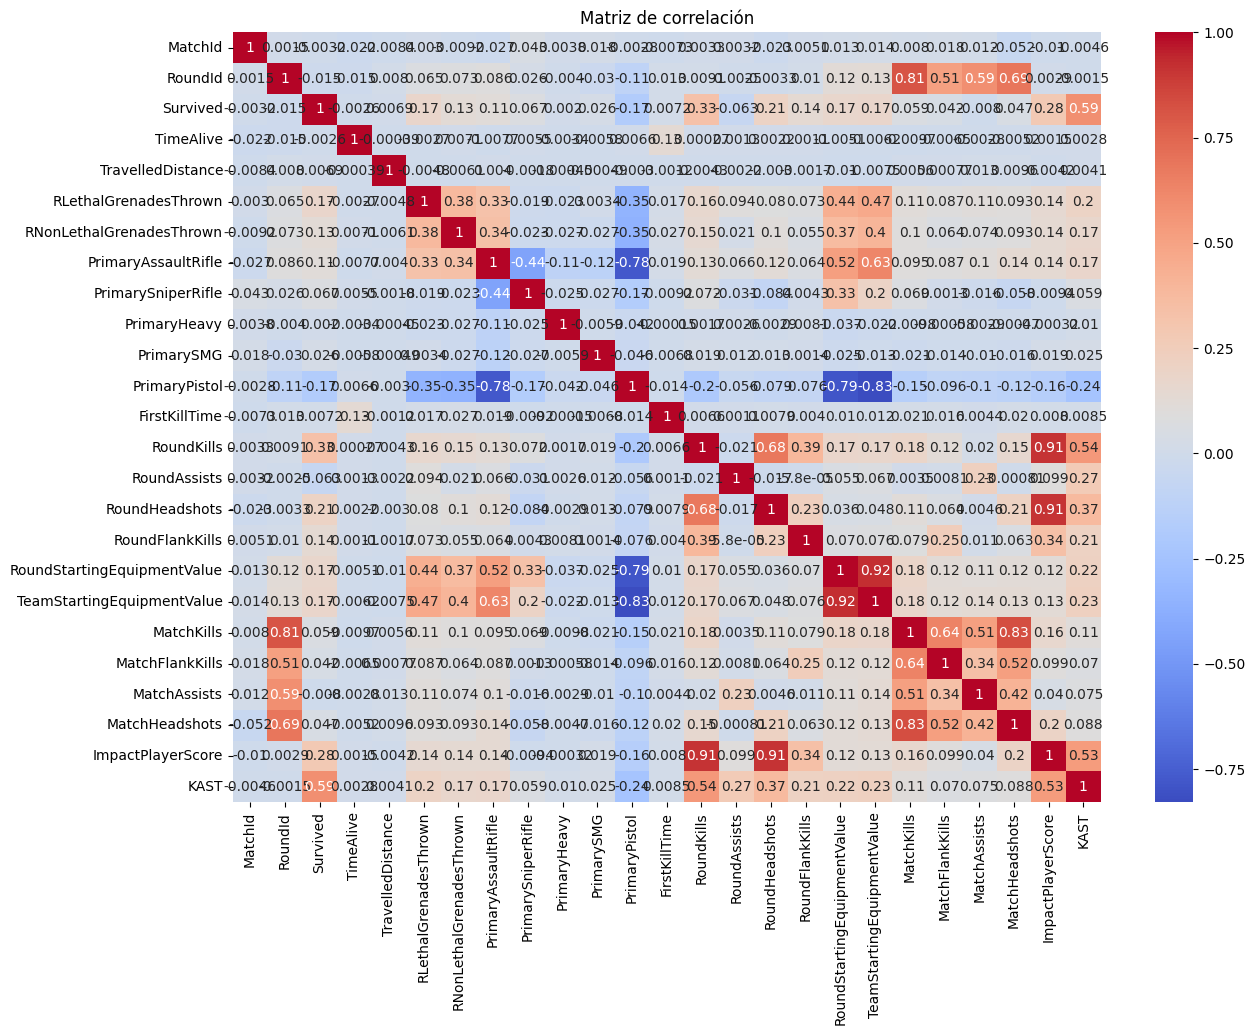

In [41]:
# Matriz de correlación
#creacion de variables KAST y Impactplayerscore
df["ImpactPlayerScore"] = df["RoundKills"] + 0.5 * df["RoundAssists"] + 1.5 * df["RoundHeadshots"]
df["KAST"] = (
    (df["RoundKills"] > 0) |
    (df["RoundAssists"] > 0) |
    (df["Survived"] == True)
).astype(int)

corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


## Fase 3: Data Preparation

Se eliminaron filas con valores nulos, columnas irrelevantes o redundantes, y se convirtieron porcentajes en valores decimales si era necesario. También se dividieron los datos entre variables independientes (features) y la variable objetivo (`ImpactPlayerScore`).

In [42]:
# Copiar el DataFrame original para el modelado
df_model = df.copy()

# Limpiar valores no válidos y convertir a tipos útiles
df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
df_model = df_model.replace({
    'True': True, 'False': False,
    'True4': True, 'False4': False,
    'TRUE': True, 'FALSE': False
})

# Convertir booleanos a enteros
for col in df_model.columns:
    if df_model[col].dtype == bool:
        df_model[col] = df_model[col].astype(int)

# One-hot encoding para variables categóricas
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Confirmar tipos
df_model = df_model.astype({col: int for col in df_model.select_dtypes(include='bool').columns})

# Mostrar correlaciones con la variable objetivo
correlaciones = df_model.corr(numeric_only=True)['ImpactPlayerScore'].sort_values(ascending=False)
display(correlaciones)


<ipython-input-42-870f193f07d5>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
<ipython-input-42-870f193f07d5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model = df_model.replace({


,ImpactPlayerScore
ImpactPlayerScore,1.000000
RoundKills,0.910805
RoundHeadshots,0.908607
KAST,0.530677
RoundFlankKills,0.340023
Survived,0.284570
MatchHeadshots,0.198661
MatchKills,0.161171
RLethalGrenadesThrown,0.143591
PrimaryAssaultRifle,0.142496


## Fase 4: Modeling

Se entrenaron tres modelos de regresión:
- Regresión Lineal
- Árbol de Decisión
- Bosque Aleatorio

Todos los modelos se entrenaron usando un 80% del conjunto de datos y se probaron con el 20% restante. Se utilizó Scikit-learn para todo el proceso de entrenamiento y predicción.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Variables con alta correlación Y que no estén incluidas directamente en el cálculo del ImpactPlayerScore
variables_relevantes = [
    'KAST', 'TimeAlive', 'TravelledDistance'  # Puedes añadir más si lo justificas
]

X = df_model[variables_relevantes]
y = df_model['ImpactPlayerScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "R²": r2_score(y_test, y_pred)
    }

# Mostrar resultados
for name, metrics in results.items():
    print(f"Modelo: {name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

# Guardar el modelo más sólido
modelo_final = models["Random Forest"]
columnas_modelo = X.columns.tolist()


Modelo: Linear Regression
  MAE: 0.8982
  MSE: 1.8599
  RMSE: 1.3638
  R²: 0.2885

Modelo: Decision Tree
  MAE: 0.8993
  MSE: 1.8718
  RMSE: 1.3681
  R²: 0.2839

Modelo: Random Forest
  MAE: 0.8988
  MSE: 1.8660
  RMSE: 1.3660
  R²: 0.2861



##Conclusion (al menos por esta fase)
Tras evaluar 3 modelos de regresion para predecir la variable impactplayerscore, se obtuvieron resultados similares entre los diferentes modelos, R**2 cercanos al 0.28, lo cual indica que estos modelos explican aproximadamente el 28% de los datos, esto sugiere una capacidad predictiva moderada.
Finalmente el seleccionado para el caso fue el modelo de Random Forest, esto debido a su equilibrio entre precision RMSE:1.366, esto tambien por ser mas estable ante datos complejos
Tambien se puede anadir que esto demuestra que es posible generar una prediccion del desempeño de un jugador mediante las variables de KAST, TimeAlive y TravelledDistance